In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [8]:
train = pd.read_csv(r"C:\Users\Aarthi\OneDrive\Desktop\ML practice DS\Titanic DS\train.csv", index_col = 'PassengerId')
test = pd.read_csv(r"C:\Users\Aarthi\OneDrive\Desktop\ML practice DS\Titanic DS\test.csv", index_col = 'PassengerId')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


I'm creating a data dictionary based on the Titanic dataset for our better understanding of the Variables and what those variables stand for.

In [12]:
titanic_dictionary = {'survived':'survived',
               'Pclass':'Passenger Ticket class',
               'sex':'Sex',
               'Age':'Age in years',
               'Sibsp':'# of siblings / spouses aboard the Titanic',
               'parch':'# of parents / children aboard the Titanic',
               'ticket':'Ticket number',
               'Fare':'Passenger fare',
               'cabin':'Cabin number',
               'Embarked':'Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)'}

In [13]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [16]:
#to find the missing data values in the train dataset
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

As shown above, we can see that Age has 177 missing values as well as Cabin has 687 missing values. We can create a heatmap to represent the info above.

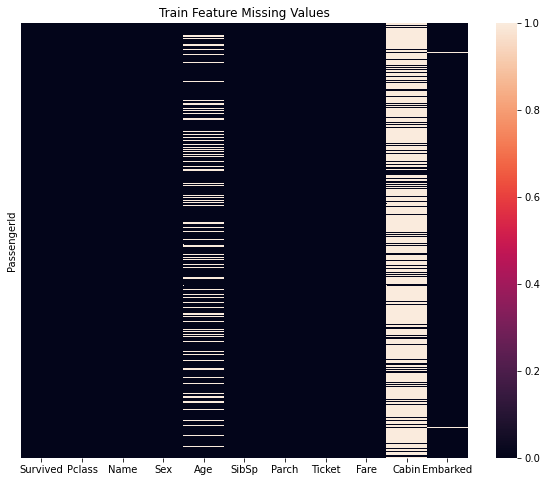

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
import seaborn as sns
sns.heatmap(train.isnull(),yticklabels = False)

plt.title("Train Feature Missing Values")
plt.show()

# **Exploratory Data Analysis on the Training Dataset**

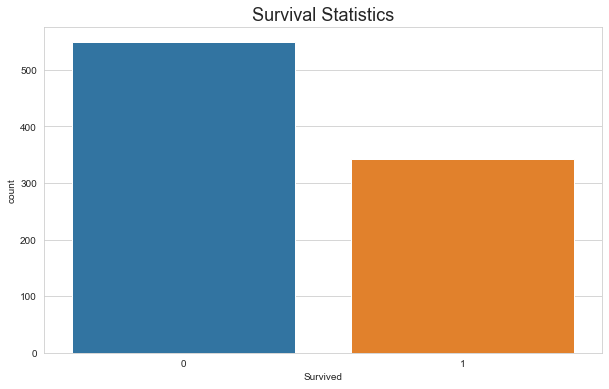

In [19]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = train)
plt.title('Survival Statistics', fontsize = 18)
plt.show()

In the above representation, '1' indicates survival rate and '0' indicates Non-survival rate. More than 350 people survived the disaster and around 500 were not able to make it.

**To check if there is dependence of Sex/Gender on the people who survived.**

Text(0.5, 1.0, 'Male/Female survivals')

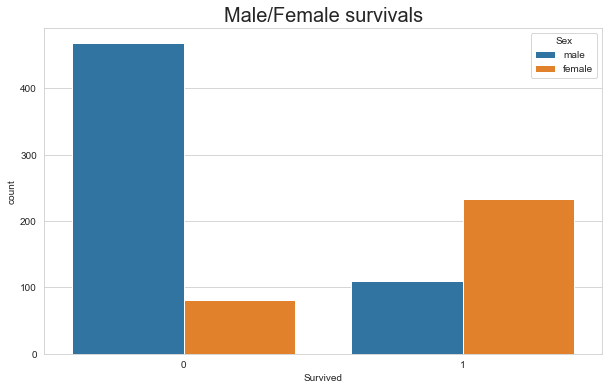

In [20]:
plt.figure(figsize= (10,6))
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex',data = train)
plt.title("Male/Female survivals",fontsize = 20)

The above plot suggests '1' is survival rate and '0' is non survival rate, blue is for male and orange is for female.

After division we can see that more than twice the number of men died in the disaster as compared to women.

**To check how it look's when we divide survival of passengers by Ticket class**

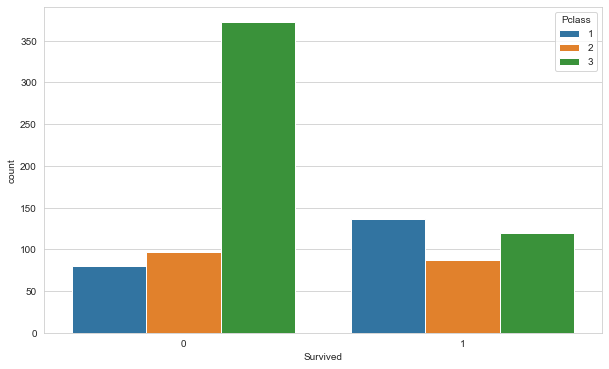

In [21]:
plt.figure(figsize = (10,6))
sns.countplot(x = "Survived", data = train, hue = "Pclass")
plt.show()

One of the observations from above plot is that the number of non survivors are more from Class 3 passengers.

**To check the distribution of passengers age.**

C:\Users\Aarthi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

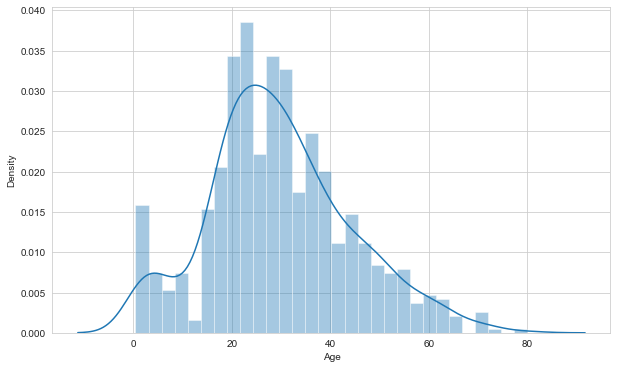

In [26]:
plt.figure(figsize = (10,6))
sns.distplot(train['Age'].dropna(),bins = 30)

We can see from the above plot that there are more number of passengers ranging from the age of 20-30.

**To check the distribution of passengers fare.**

(array([496., 191.,  45.,  45.,  48.,  13.,  11.,  11.,   9.,   2.,   0.,
          0.,   5.,   4.,   2.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  17.07764,  34.15528,  51.23292,  68.31056,  85.3882 ,
        102.46584, 119.54348, 136.62112, 153.69876, 170.7764 , 187.85404,
        204.93168, 222.00932, 239.08696, 256.1646 , 273.24224, 290.31988,
        307.39752, 324.47516, 341.5528 , 358.63044, 375.70808, 392.78572,
        409.86336, 426.941  , 444.01864, 461.09628, 478.17392, 495.25156,
        512.3292 ]),
 <BarContainer object of 30 artists>)

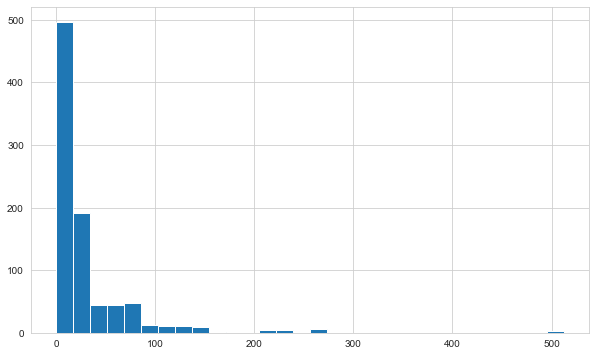

In [27]:
plt.figure(figsize= (10,6))
plt.hist(train['Fare'],bins = 30)

Most of the passengers, as observed earlier, were travelling in the third class. As we can see from the plot, tickets for the third class were not too expensive. There are some outliers, probably some of passengers in first class bought some extra services. 

# **Cleaning Training Data**

"Age' column has 177 missing values, and the total number of passengers were: 891. So, the percentage of rows with missing values of Age are: (177/891)*100

In [31]:
(train['Age'].isnull().sum()/(train['Age'].count()+ train['Age'].isnull().sum()))*100

19.865319865319865

**Creating a BoxPlot to check if Age can depend on the Passengers travelling Class.**

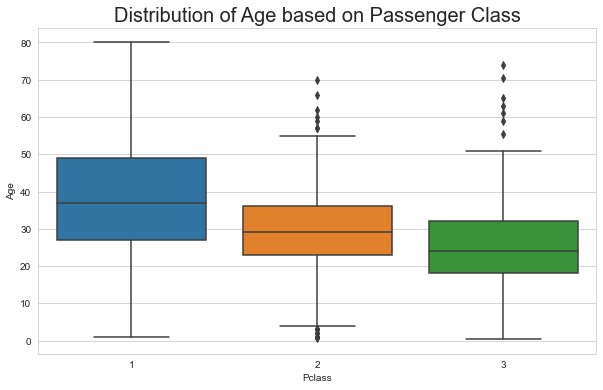

In [32]:
plt.figure(figsize = (10,6))
sns.boxplot(x= 'Pclass' , y = "Age" , data = train)
plt.title("Distribution of Age based on Passenger Class", fontsize =20)
plt.show()

We can see that passengers who bought tickets in first class are older than passengers in other classes. We can assume that richer and older passengers are sitting in the first class. So then, let's impute missing values for age depending on ticket class.

In [33]:
train.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [34]:
def age_imputation(column):
    Age = column[0]
    Pclass = column[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return train[train["Pclass"]==1].mean()["Age"].round()
        elif Pclass == 2:
            return train[train["Pclass"]==2].mean()["Age"].round()
        elif Pclass == 3:
            return train[train["Pclass"]==3].mean()["Age"].round()
    else:
        return Age

In [35]:
train["Age"] = train[["Age","Pclass"]].apply(age_imputation,axis = 1)

In [36]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [37]:
(687/891)* 100

77.10437710437711

We can see that Cabin has 77% of missing data, so we can ignore and drop the column.

In [38]:
train.drop("Cabin", axis = 1, inplace = True)

In [39]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

Now we have only one column with missing values - 'Embarked'. As there are only two observations with missing values we can delete these observations.

In [40]:
train.dropna(inplace = True)

In [41]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [42]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Converting the Non-categorical data into categorical data


**The name column has Annotations(Mr,Mrs etc) in the middle. We can make them categorical.**

In [44]:
#using Python regex
train['Title'] = train.Name.str.extract(r',\s([a-zA-Z ]+)', expand = False)

In [45]:
train['Title'].value_counts()

Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Don               1
Lady              1
Ms                1
Jonkheer          1
the Countess      1
Mme               1
Sir               1
Capt              1
Name: Title, dtype: int64

Titles such as Ms, Mme, etc., occur once or twice in the dataset. We can replace these titles with more meaningful and understandable titles such as Mr, Miss.

In [46]:
train['Title'] = train['Title'].replace(to_replace = "Master", value = 'Mr')
train['Title'] = train['Title'].replace(to_replace = ['Mlle','Ms','Mme'], value = 'Miss')
train['Title'] = train['Title'].replace(to_replace = ['Dr','Rev','Major','Col','Don','Jonkheer','Lady','the Countess','Capt','Sir'],value = 'Other')

In [47]:
train["Title"].value_counts()

Mr       557
Miss     185
Mrs      124
Other     23
Name: Title, dtype: int64

**Creating a boxplot for these new variables v/s age.**

Text(0.5, 1.0, 'Age vs Title')

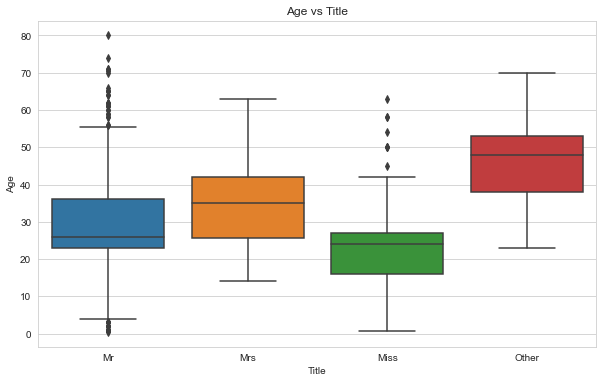

In [49]:
plt.figure(figsize = (10,6))
sns.boxplot( x = 'Title', data = train, y = 'Age' )

plt.title("Age vs Title")

**Let's check the death rate as per the above reframed data.**

<AxesSubplot:xlabel='Survived', ylabel='count'>

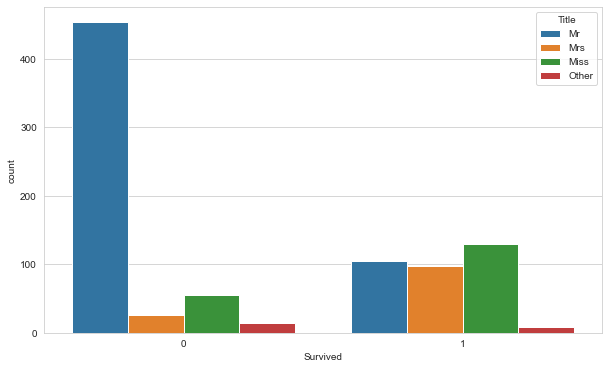

In [50]:
plt.figure(figsize = (10,6))

sns.countplot( x= 'Survived', data = train, hue = "Title" )

In [51]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


**Using get_dummies() to convert the categorical functions into dummy ones.**

In [52]:
d_title = pd.get_dummies(train['Title'],drop_first = True, prefix = "Title")
d_sex = pd.get_dummies(train['Sex'], drop_first = True, prefix = "Sex")
d_embarked = pd.get_dummies(train['Embarked'], drop_first = True, prefix = "Emparked")
train = pd.concat([train,d_title,d_sex,d_embarked], axis = 1)
train.drop(["Name","Sex","Ticket",'Embarked','Title'], axis = 1 , inplace = True)

In [53]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title_Mr,Title_Mrs,Title_Other,Sex_male,Emparked_Q,Emparked_S
PassengerId,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,0,1,0,1
2,1,1,38.0,1,0,71.2833,0,1,0,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,0,0,0,1
4,1,1,35.0,1,0,53.1000,0,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,0,1,0,1


# **Cleaning Test Data**

In [54]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [56]:
test.groupby('Pclass').mean()['Age']

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [57]:
def age_imputation_test(column):
    Age = column[0]
    Pclass = column[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return test[test["Pclass"]==1].mean()["Age"].round()
        elif Pclass == 2:
            return test[test["Pclass"]==2].mean()["Age"].round()
        elif Pclass == 3:
            return test[test["Pclass"]==3].mean()["Age"].round()
    else:
        return Age

In [58]:
test["Age"] = test[["Age","Pclass"]].apply(age_imputation_test,axis = 1)

In [59]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

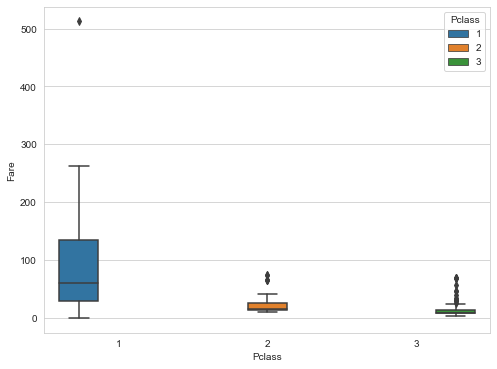

In [60]:
plt.figure(figsize = (8,6))

sns.boxplot(x = 'Pclass', y = 'Fare',hue = 'Pclass', data = test)

In [61]:
test.groupby('Pclass').mean()['Fare']

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [62]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [63]:
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [64]:
test.fillna(test[test['Pclass']==3].mean()['Fare'],inplace = True)

In [65]:
test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [66]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,12.459678,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,12.459678,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,12.459678,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,12.459678,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,12.459678,S


In [67]:
test["Name_"] = test.Name.str.extract(r',\s([a-zA-Z]+)', expand = True)

In [68]:
test['Name_'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Name_, dtype: int64

In [69]:
test['Name_'] = test['Name_'].replace(to_replace = "Master", value = "Mr")
test["Name_"] = test["Name_"].replace(to_replace = "Ms", value = "Miss")
test["Name_"] = test["Name_"].replace(to_replace = ["Rev", 'Col','Dona', 'Dr'], value = 'Others')

In [70]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,12.459678,Q,Mr
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,12.459678,S,Mrs
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,12.459678,Q,Mr
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,12.459678,S,Mr
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,12.459678,S,Mrs


In [71]:
Dummy_Name = pd.get_dummies(test["Name_"],drop_first = True, prefix = "Title")
Dummy_Sex = pd.get_dummies(test['Sex'], drop_first = True)
Dummy_Embarked = pd.get_dummies(test['Embarked'], drop_first = True,prefix = 'Embarked')
test = pd.concat([test,Dummy_Name,Dummy_Embarked, Dummy_Sex],axis = 1)

In [72]:
test.drop(['Name','Sex','Embarked','Name_','Ticket','Cabin'],axis = 1,inplace = True)

In [73]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Title_Mr,Title_Mrs,Title_Others,Embarked_Q,Embarked_S,male
PassengerId,,,,,,,,,,,
892,3,34.5,0,0,7.8292,1,0,0,1,0,1
893,3,47.0,1,0,7.0000,0,1,0,0,1,0
894,2,62.0,0,0,9.6875,1,0,0,1,0,1
895,3,27.0,0,0,8.6625,1,0,0,0,1,1
896,3,22.0,1,1,12.2875,0,1,0,0,1,0


# Spliting the train data

In [74]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title_Mr,Title_Mrs,Title_Other,Sex_male,Emparked_Q,Emparked_S
PassengerId,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,0,1,0,1
2,1,1,38.0,1,0,71.2833,0,1,0,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,0,0,0,1
4,1,1,35.0,1,0,53.1000,0,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,0,1,0,1


In [75]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [76]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 1)

# Logistic Regression

In [79]:
l_model = LogisticRegression()
l_model.fit(X_train,y_train)

C:\Users\Aarthi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
l_model_data = l_model.predict(X_test)
l_train_model = l_model.predict(X_train)

In [84]:
test_prediction = l_model.predict(test)